# Week 9: Numerically integrating a probability distribution -- Master equations

<hr>

## Learning Objectives
- Revisiting from last semester: simulate diffusion via "coin flips" 
- Approach diffusion using a "Master Equation" approach to numerically integrate the distribution of diffusion particles over time
- Alter the initial conditions and parameters of the integration to simulate different biological processes

In [3]:
import numpy as np
import numba
import random
import matplotlib.pyplot as plt
import scipy.integrate

import seaborn as sns
sns.set(font_scale = 1.5, rc={"lines.linewidth":2})

## Diffusion via coin flips

As a throwback to last semester, let's simulate a particle diffusing over time. We can consider the particle of interest as starting at position 0. At each time point, it will move +1 if we "flip a coin" and get heads, and will move -1 if get tails.

As a reminder, we can simulate flipping a coin by using the `random` module:

In [5]:
rand = random.random()
rand

0.5319746989262999

Once we have a randomly generated number, we can assign what we want to do next based on the value. As an example, I print `heads` or `tails` below.

In [6]:
if rand > 0.5:
    print("heads")
          
if rand < 0.5:
    print("tails")

heads


### Activity 1

Below, use this concept of "coin flips" to simulate a particle's position over time.

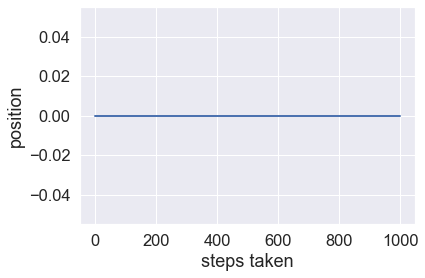

In [13]:
# number of steps
n_steps = 1000

# array to store particle position
x = np.zeros(n_steps)

# simulate the particle moving moving over time
#
#

# Show the trajectory
plt.plot(x)
plt.xlabel('steps taken')
plt.ylabel('position');

As we can see, the position of the particle moves about the origin in an un-directed fashion as a result of the randomness of the steps taken. However, it's hard to conclude anything from this single trace. Only by simulating many of these trajectories can we begin to conclude some of the scaling properties of diffusing particles.

### Activity 2

Repeat the simulation above for 100 particles and plot the trajectories on the same plot. We can use this to get a sense of the typical behavior since a single trajectory might not be representative. 

## Master equation

While it is useful to demonstrate this behavior stochastically as we've done above, we may also wish to know the deterministic behavior, akin to when we've done numerical integration in for differential equations. For this, we will introduce something known as the "Master Equation" as a way to track not individual particles, but instead the *probability* that particles will be found at various positions. 

This involves keeping track of the probability $p(n,t)$ of particles being at location $n$ at time $t$:

$$
\overbrace{p(n, t+\Delta t)}^{\text {new probability }}=\underbrace{p(n, t)}_{\text {old probability }}+\overbrace{k \Delta t p(n-1, t)}^{\text {particles moving in from left }}+\underbrace{k \Delta t p(n+1, t)}_{\text {particles moving in from right }}-\overbrace{2 k \Delta t p(n, t)}^{\text {particles leaving to left or right }} .
$$

This master equation allows us to calculate the probability of the walker being at position  n  at the next time step  $t+ \Delta t$ , given the probabilities at the current time step  $t$ . $k$  is the "hopping rate" between neighboring positions, and  $\Delta t$  is the time step used in the numerical calculation. For this simulation, we will use a 2D-array where we are keeping track of $N$ "boxes" that the particles can be in over time.

Due computational limits, there are only so many "boxes" we can keep track of. This means we will have to specify what are known as "boundary conditions" at our left-most and right-most boxes.  

### Activity 3

Below specify what the Master Equation would be for the 0th and Nth boxes, keeping in mind that particles :

$$
\overbrace{p(0, t+\Delta t)}^{\text {new probability }}=\underbrace{p(0, t)}_{\text {old probability }} + \ ???
$$

$$
\overbrace{p(N, t+\Delta t)}^{\text {new probability }}=\underbrace{p(N, t)}_{\text {old probability }} + \ ???
$$

Below I set up the parameters and arrays we will need for the Master Equation integration. 

In [107]:
# number of boxes
n_boxes = 41

# time increment (Delta t) in seconds
dt = 0.1

# number of steps
n_steps = 1000

# hopping rate constant (k) in sec^-1
k = 1

# initialize the probability distribution
p = np.zeros([n_boxes, n_steps])

# find the middle box
n_center = int(n_boxes / 2)

# set the middle box to have probability 1 at the initial time step 
p[0, 0] = 1

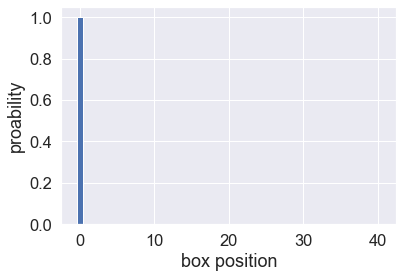

In [108]:
plt.bar(np.arange(n_boxes), p[:,0])
plt.xlabel("box position")
plt.ylabel("proability");

### Activity 4 / Start of the homework 

Using the Master Equations we specified above, integrate the $p(n,t)$ probability array.

In [71]:
# loop through the number of steps
for t in range(1, n_steps):
    
    # update probability array in the interior region
    for b in range(1,n_boxes-1):
        p[b,t] = p[b,t-1] + ???

    # update probability array for the left-most box
    p[0,t] = p[0, t-1] + ???
    
    # update probability array for the right-most box
    p[-1,t] = p[-1, t-1] + ???

SyntaxError: invalid syntax (3688657676.py, line 6)

## Problem 1 - Diffusion in a box

From the Master Equation numerical integration, plot the probability distribution of the particles at time step 0, 49, and 99. How does this time-lapse show diffusion?

## Problem 2 - Diffusion in a smaller box

Repeat the numerical integration and plotting with `n_boxes = 11`. Describe what you see and compare it to the plots in Problem 1.

## Problem 3 - Setting up a gradient

[Bicoid](https://en.wikipedia.org/wiki/Homeotic_protein_bicoid) is a key gene in the early development of the fruit fly, Drosophila. The protein is initially only found on the anterior (head) side of the embryo and diffuses further down the embryo over time. This ultimately results in a gradient, with diminishing amounts of Bicoid as you go further along the embryo. To simulate this process of the Bicoid gradient being set up, take the following steps:

- Edit the initial probability array (back to `n_boxes = 41`) to represent this scenario with Bicoid, where initially 100% of the particle probability is in the left-most "box".
- Run the Master Equation integration for `n_steps = 500`.
- Plot the results at time step 0, 249, and 499.
- Describe what you see and explain how diffusion was able to set up a gradient.

## Problem 4 - Fluorescence recovery after photobleaching (FRAP)

Having developed the numerical method of integrating the master equation, let's consider its application to the problem of fluorescence recovery after photobleaching (FRAP). In FRAP experiments, the fluorescently labeled molecules initially have a uniform distribution. Applying high intensity light, the fluorescent molecules in the desired region get photobleached, meaning that they no longer fluoresce. Over time, the fluorescent molecules that were outside the photobleached region will diffuse into it, recovering the uniform fluorescence distribution. By estimating the timescale of fluorescence recovery, experimentalists can determine the diffusion constant of fluorescently labeled molecules. To simulate FRAP, take the following steps: 

- Initailize the probability array such that all 41 boxes have the same amount of fluorescence to begin with.
- "Photobleach" the middle ten boxes, setting their probability to 0.
- Run the Master Equation integration for `n_step = 1000`.
- Plot the results at time step 0, 449, and 999.
- Describe what you see happening. Give a biological reason why fluorescence recovery might happen faster or slower in real life. Which parameter would you change to model this? 